In [126]:
from gensim.test.utils import common_texts, get_tmpfile # get_tmpfile: save a model for us
from gensim.models import Word2Vec
from nltk import word_tokenize
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [127]:
data = pd.read_csv("occ_cleaned.csv")
data.head()

,product_id,attribute_name,attribute_value,brand,description,details,name
0,01DVS1SHB0MXNERKX17C3P5YXS,occasion,weekend,mansurgavriel,Mansur Gavriel's sleek mini top handle bag was...,Zip fastening across top Composition: calf lea...,Mini Leather Top Handle Bag
1,01DVS1SHB0MXNERKX17C3P5YXS,occasion,weekend,mansurgavriel,Mansur Gavriel's sleek mini top handle bag was...,Zip fastening across top Composition: calf lea...,Mini Leather Top Handle Bag
2,01DPEEZGRJYX4N4WE78GPM0B2G,occasion,weekend,jcrew,Meet your new favorite everyday ankle boot&mda...,UNKNOWN_TOKEN,Sadie boots in suede
3,01DTJ8EMCR26JCYAWK0CYST9H7,occasion,daytonight,marni,It’s everything you want in a structured every...,UNKNOWN_TOKEN,Law Bag Shoulder Bag
4,01E1JKZ7CJ8A3C1PPM0QCAEDGY,occasion,work,veronicabeard,Made from the highest quality Japanese stretch...,"High rise. True to size. SIZEVALUE, SIZEVALUE...",Kate 10 Skinny Jeans


In [130]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_num = re.sub('[0-9]+', '', cleantext)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    return " ".join(stem_words)


data['cleanText']=data['description'].map(lambda s:preprocess(s)) 

In [134]:
pd.set_option('max_colwidth', 400)
data[['description','cleanText']].head()

,description,cleanText
0,Mansur Gavriel's sleek mini top handle bag was crafted in Italy from soft calfskin with a crescent-shaped top. Its minimal look allows for maximum versatility making it a viable option to pair with dresses and tailored looks alike. \r\n,mansur gavriel sleek mini top handl bag craft itali soft calfskin crescent shape top minim look allow maximum versatil make viabl option pair dress tailor look alik
1,Mansur Gavriel's sleek mini top handle bag was crafted in Italy from soft calfskin with a crescent-shaped top. Its minimal look allows for maximum versatility making it a viable option to pair with dresses and tailored looks alike. \n,mansur gavriel sleek mini top handl bag craft itali soft calfskin crescent shape top minim look allow maximum versatil make viabl option pair dress tailor look alik
2,"Meet your new favorite everyday ankle boot&mdash;now in a soft suede that goes great with fall florals, cropped denim and the ever-so-satisfying crunch of stepping on fallen leaves.",meet new favorit everyday ankl boot mdash soft sued goe great fall floral crop denim ever satisfi crunch step fallen leav
3,"It’s everything you want in a structured everyday bag—gloriously spacious size, optional crossbody strap, convenient storage compartments (for all the things)—and then some. And that classic tri-color leather is so classic. Plus, it zips shut—so it’s especially travel/subway/and metro-friendly.Leather, brassHeight: 8.7""; Width: 12""; Depth: 5.9""Made in Italy",everyth want structur everyday bag glorious spaciou size option crossbodi strap conveni storag compart thing classic tri color leather classic plu zip shut especi travel subway metro friendli leather brassheight width depth made itali
4,"Made from the highest quality Japanese stretch denim, these high-rise skinnies boast a flattering fit and fantastic shape recovery.",made highest qualiti japanes stretch denim high rise skinni boast flatter fit fantast shape recoveri


In [125]:
data.shape

(12988, 7)

In [3]:
data.describe()

,product_id,attribute_name,attribute_value,brand,description,details,name
count,12988,12988,12988,12988,12988,12988,12988
unique,3914,1,7,308,3518,2574,3396
top,01DS48V97WA6D0APP3S4ABZN2P,occasion,weekend,frame,UNKNOWN_TOKEN,UNKNOWN_TOKEN,Hunter
freq,20,12988,4275,1151,1166,1152,156


In [4]:
data.attribute_value.unique()

array(['weekend', 'daytonight', 'work', 'vacation', 'nightout', 'workout',
       'coldweather'], dtype=object)

In [5]:
all_value = data.groupby('product_id')['attribute_value'].unique().reset_index()

## label=1

In [6]:
wkd = all_value[all_value['attribute_value'].apply(lambda x: 'weekend' in x)]
wkd = pd.merge(wkd, data, how='left', on='product_id')
wkd = wkd.iloc[:,3:]
wkd.columns = ['label','brand','description','details','name']
wkd = wkd[wkd.label=='weekend']
wkd.drop_duplicates(inplace=True)

In [7]:
dtn = all_value[all_value['attribute_value'].apply(lambda x: 'daytonight' in x)]
dtn = pd.merge(dtn, data, how='left', on='product_id')
dtn = dtn.iloc[:,3:]
dtn.columns = ['label','brand','description','details','name']
dtn = dtn[dtn.label=='daytonight']
dtn.drop_duplicates(inplace=True)

In [8]:
work = all_value[all_value['attribute_value'].apply(lambda x: 'work' in x)]
work = pd.merge(work, data, how='left', on='product_id')
work = work.iloc[:,3:]
work.columns = ['label','brand','description','details','name']
work = work[work.label=='work']
work.drop_duplicates(inplace=True)

In [9]:
ntot = all_value[all_value['attribute_value'].apply(lambda x: 'nightout' in x)]
ntot = pd.merge(ntot, data, how='left', on='product_id')
ntot = ntot.iloc[:,3:]
ntot.columns = ['label','brand','description','details','name']
ntot = ntot[ntot.label=='nightout']
ntot.drop_duplicates(inplace=True)

In [10]:
vc = all_value[all_value['attribute_value'].apply(lambda x: 'vacation' in x)]
vc = pd.merge(vc, data, how='left', on='product_id')
vc = vc.iloc[:,3:]
vc.columns = ['label','brand','description','details','name']
vc = vc[vc.label=='vacation']
vc.drop_duplicates(inplace=True)

In [11]:
wkot = all_value[all_value['attribute_value'].apply(lambda x: 'workout' in x)]
wkot = pd.merge(wkot, data, how='left', on='product_id')
wkot = wkot.iloc[:,3:]
wkot.columns = ['label','brand','description','details','name']
wkot = wkot[wkot.label=='workout']
wkot.drop_duplicates(inplace=True)

In [12]:
cw = all_value[all_value['attribute_value'].apply(lambda x: 'coldweather' in x)]
cw = pd.merge(cw, data, how='left', on='product_id')
cw = cw.iloc[:,3:]
cw.columns = ['label','brand','description','details','name']
cw = cw[cw.label=='coldweather']
cw.drop_duplicates(inplace=True)

## label = 0

In [13]:
nwkd = all_value[all_value['attribute_value'].apply(lambda x: 'weekend' not in x)]
nwkd = pd.merge(nwkd, data, how='left', on='product_id')
nwkd = nwkd.iloc[:,3:]
nwkd.columns = ['label','brand','description','details','name']
nwkd['label'] = 0
nwkd.drop_duplicates(inplace=True)

In [14]:
ndtn = all_value[all_value['attribute_value'].apply(lambda x: 'daytonight' not in x)]
ndtn = pd.merge(ndtn, data, how='left', on='product_id')
ndtn = ndtn.iloc[:,3:]
ndtn.columns = ['label','brand','description','details','name']
ndtn['label'] = 0
ndtn.drop_duplicates(inplace=True)

In [15]:
nvc = all_value[all_value['attribute_value'].apply(lambda x: 'vacation' not in x)]
nvc = pd.merge(nvc, data, how='left', on='product_id')
nvc = nvc.iloc[:,3:]
nvc.columns = ['label','brand','description','details','name']
nvc['label'] = 0
nvc.drop_duplicates(inplace=True)

In [16]:
nwkot = all_value[all_value['attribute_value'].apply(lambda x: 'workout' not in x)]
nwkot = pd.merge(nwkot, data, how='left', on='product_id')
nwkot = nwkot.iloc[:,3:]
nwkot.columns = ['label','brand','description','details','name']
nwkot['label'] = 0
nwkot.drop_duplicates(inplace=True)

In [17]:
ncw = all_value[all_value['attribute_value'].apply(lambda x: 'coldweather' not in x)]
ncw = pd.merge(ncw, data, how='left', on='product_id')
ncw = ncw.iloc[:,3:]
ncw.columns = ['label','brand','description','details','name']
ncw['label'] = 0
ncw.drop_duplicates(inplace=True)

## wkd

## description

In [95]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import spacy
import en_core_web_md
from sklearn.model_selection import train_test_split

In [96]:
num_1 = len(wkd['description'])
num_0 = len(nwkd['description'])
docs = wkd['description'].tolist() + nwkd['description'].tolist()
labels = np.concatenate([np.ones(num_1), np.zeros(num_0)])

In [97]:
nlp = en_core_web_md.load()
stopwords_removed_docs = list(
    map(lambda doc: " ".join([token.text for token in nlp(doc) if not token.is_stop]), docs))

In [98]:
tokenizer = Tokenizer(num_words=5000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(stopwords_removed_docs)

In [99]:
def integer_encode_documents(docs, tokenizer):
    return tokenizer.texts_to_sequences(docs)

# integer encode the documents
encoded_docs = integer_encode_documents(stopwords_removed_docs, tokenizer)
# this is a list of lists, the numbers represent the index position of that word.
MAX_SEQUENCE_LENGTH = len(max(stopwords_removed_docs,key=len))
padded_docs = pad_sequences(encoded_docs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [100]:
encoder = LabelEncoder()
labels = to_categorical(encoder.fit_transform(labels))

In [101]:
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.2)

### Glove

In [102]:
from random import randint
from numpy import array, argmax, asarray, zeros
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras import optimizers

In [103]:
def load_glove_vectors():
    embeddings_index = {}
    with open('glove.6B.100d.txt') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print('Loaded %s word vectors.' % len(embeddings_index))
    return embeddings_index


embeddings_index = load_glove_vectors()

Loaded 400000 word vectors.


In [104]:
VOCAB_SIZE = int(len(tokenizer.word_index) * 1.1)

In [105]:
len(tokenizer.word_index)

5793

In [106]:
embedding_matrix = zeros((VOCAB_SIZE, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: # check that it is an actual word that we have embeddings for
        embedding_matrix[i] = embedding_vector

In [107]:
embedding_matrix.shape

(6372, 100)

In [120]:
from keras.layers.recurrent import SimpleRNN, LSTM
from keras.layers import Flatten, Masking
# define model

def make_binary_classification_rnn_model(plot=False):
    model = Sequential()
    # embedding(input_dim, output_dim)
    model.add(Embedding(VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
    model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
    model.add(SimpleRNN(units=32, input_shape=(1, MAX_SEQUENCE_LENGTH))) # set hidden state dimensionality to 64
    model.add(Dense(16))
    model.add(Dense(2, activation='softmax')) # 2 nodes, prediction for positive/negative, two classes
    
    # Compile the model
    model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # summarize the model
    model.summary()
    
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

def make_lstm_classification_model(plot=False):
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
    model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
    model.add(LSTM(units=32, input_shape=(1, MAX_SEQUENCE_LENGTH), return_sequences=True))
    #model.add(Dense(16))
    model.add(Dense(2, activation='softmax'))
    
    opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    # Compile the model
    model.compile(
    optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    # summarize the model
    model.summary()
    
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [121]:
MAX_SEQUENCE_LENGTH = len(max(stopwords_removed_docs,key=len))
model = make_lstm_classification_model()
#model = make_binary_classification_rnn_model()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 862, 100)          637200    
_________________________________________________________________
masking_12 (Masking)         (None, 862, 100)          0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 862, 32)           17024     
_________________________________________________________________
dense_17 (Dense)             (None, 862, 2)            66        
Total params: 654,290
Trainable params: 17,090
Non-trainable params: 637,200
_________________________________________________________________


In [122]:
history = model.fit(X_train, y_train,validation_split = 0.1, epochs=5, verbose=1)

ValueError: Error when checking target: expected dense_17 to have 3 dimensions, but got array with shape (3189, 2)

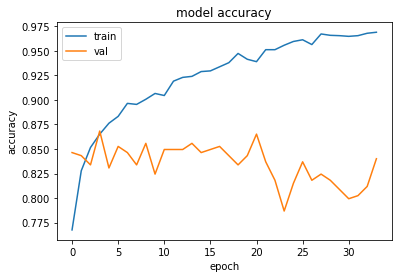

In [119]:
import keras
from matplotlib import pyplot as plt

def plot_fit_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
plot_fit_history(history)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

In [ ]:
output = model.predict(X_train)
print(output, '\n shape:', output.shape)

### Train own embedding

In [156]:
num_1 = len(wkd['description'])
num_0 = len(nwkd['description'])
docs = wkd['description'].tolist() + nwkd['description'].tolist()
labels = np.concatenate([np.ones(num_1), np.zeros(num_0)])

In [157]:
nlp = en_core_web_md.load()
stopwords_removed_docs = list(
    map(lambda doc: " ".join([token.text for token in nlp(doc) if not token.is_stop]), docs))

In [158]:
def integer_encode_documents(docs, tokenizer):
    return tokenizer.texts_to_sequences(docs)


vocab_size = 5000
MAX_SEQUENCE_LENGTH = len(max(stopwords_removed_docs,key=len))
EMBEDDING_SIZE = 100


tokenizer = Tokenizer()
tokenizer.fit_on_texts(stopwords_removed_docs)
encoded_docs = integer_encode_documents(stopwords_removed_docs, tokenizer)
padded_docs = pad_sequences(encoded_docs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

encoder = LabelEncoder()
labels = to_categorical(encoder.fit_transform(labels))
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.2)

In [159]:
model = make_lstm_classification_model()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 862, 100)          40000000  
_________________________________________________________________
masking_14 (Masking)         (None, 862, 100)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 32)                17024     
_________________________________________________________________
dense_27 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 34        
Total params: 40,017,586
Trainable params: 17,586
Non-trainable params: 40,000,000
_________________________________________________________________


In [160]:
history = model.fit(X_train, y_train,validation_split = 0.1, epochs=25, verbose=1)

Train on 2870 samples, validate on 319 samples
Epoch 1/25
2870/2870 [==============================] - 69s 24ms/step - loss: 0.5740 - accuracy: 0.7314 - val_loss: 0.5516 - val_accuracy: 0.7586
Epoch 2/25
2870/2870 [==============================] - 63s 22ms/step - loss: 0.5368 - accuracy: 0.7624 - val_loss: 0.5519 - val_accuracy: 0.7586
Epoch 3/25
2870/2870 [==============================] - 63s 22ms/step - loss: 0.5224 - accuracy: 0.7627 - val_loss: 0.5521 - val_accuracy: 0.7586
Epoch 4/25
2870/2870 [==============================] - 66s 23ms/step - loss: 0.5059 - accuracy: 0.7655 - val_loss: 0.5649 - val_accuracy: 0.7586
Epoch 5/25
2870/2870 [==============================] - 67s 23ms/step - loss: 0.4860 - accuracy: 0.7791 - val_loss: 0.5590 - val_accuracy: 0.7680
Epoch 6/25
2870/2870 [==============================] - 66s 23ms/step - loss: 0.4541 - accuracy: 0.7941 - val_loss: 0.5754 - val_accuracy: 0.7618
Epoch 7/25
2870/2870 [==============================] - 68s 24ms/step - loss:

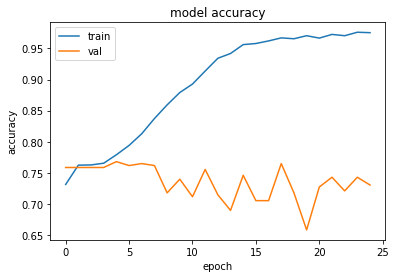

In [161]:
plot_fit_history(history)

In [162]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

798/798 [==============================] - 3s 4ms/step
Accuracy: 72.180450


## Other features

In [40]:
# from https://radimrehurek.com/gensim/models/word2vec.html
from gensim.test.utils import common_texts, get_tmpfile # get_tmpfile: save a model for us
from gensim.models import Word2Vec

path = get_tmpfile("word2vec.model")
model = Word2Vec(size=100, window=3, min_count=5, workers=4)
model.save("word2vec.model")

In [41]:
wkd['other features'] = wkd[['brand','details','name']].apply(lambda x: " ".join(x.astype(str)),axis=1)
nwkd['other features'] = nwkd[['brand','details','name']].apply(lambda x: " ".join(x.astype(str)),axis=1)
num_1 = len(wkd['other features'])
num_0 = len(nwkd['other features'])
features = wkd['other features'].tolist() + nwkd['other features'].tolist()
labels = np.concatenate([np.ones(num_1), np.zeros(num_0)])

In [42]:
nlp = en_core_web_md.load()
stopwords_removed_docs = list(
    map(lambda doc: " ".join([token.text for token in nlp(doc) if not token.is_stop]), features))

In [43]:
tokenizer = Tokenizer(num_words=5000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(stopwords_removed_docs)
tok_word_num = len(tokenizer.word_index)

In [44]:
def integer_encode_documents(docs, tokenizer):
    return tokenizer.texts_to_sequences(docs)

encoded_docs = integer_encode_documents(stopwords_removed_docs, tokenizer)
# this is a list of lists, the numbers represent the index position of that word.
MAX_SEQUENCE_LENGTH = len(max(stopwords_removed_docs,key=len))
padded_docs = pad_sequences(encoded_docs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [45]:
encoder = LabelEncoder()
labels = to_categorical(encoder.fit_transform(labels))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.2)

In [47]:
X_train.shape

(3189, 989)

In [48]:
y_train.shape

(3189, 2)

In [54]:
w2vdocs = [word_tokenize(f) for f in features]
w2vmodel = Word2Vec(w2vdocs, size=100, window=3, min_count=5, workers=4)

In [55]:
len(w2vmodel.wv.vocab)

1958

In [59]:
VOCAB_SIZE = int(len(tokenizer.word_index) * 1.3)
#VOCAB_SIZE = len(w2vmodel.wv.vocab)
#VOCAB_SIZE = min(5000, tok_word_num)+1
embedding_matrix = zeros((VOCAB_SIZE, 100))
for word, i in tokenizer.word_index.items():
    if word in w2vmodel:
        embedding_matrix[i] = w2vmodel[word]
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Null word embeddings: 6767


In [60]:
embedding_matrix.shape

(7472, 100)

In [61]:
VOCAB_SIZE

7472

In [90]:
from keras.layers.recurrent import SimpleRNN, LSTM
from keras.layers import Flatten, Masking
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model, Sequential

# define model

def make_binary_classification_rnn_model(plot=False):
    model = Sequential()
    # embedding(input_dim, output_dim)
    model.add(Embedding(VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
    model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
    model.add(SimpleRNN(units=32, input_shape=(1, MAX_SEQUENCE_LENGTH))) # set hidden state dimensionality to 64
    model.add(Dense(16))
    model.add(Dense(2, activation='softmax')) # 2 nodes, prediction for positive/negative, two classes
    
    # Compile the model
    model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # summarize the model
    model.summary()
    
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

def make_lstm_classification_model(plot=False):
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True))
    model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
    model.add(LSTM(units=32, input_shape=(1, MAX_SEQUENCE_LENGTH)))
    model.add(Dense(16))
    model.add(Dense(2, activation='softmax'))
    
    opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    # early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
    mc = ModelCheckpoint('best_model_feature.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

    # Compile the model
    model.compile(
    optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # summarize the model
    model.summary()
    
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model, es, mc

In [91]:
MAX_SEQUENCE_LENGTH = len(max(stopwords_removed_docs,key=len))
model, es, mc = make_lstm_classification_model()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 989, 100)          747200    
_________________________________________________________________
masking_7 (Masking)          (None, 989, 100)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 34        
Total params: 764,786
Trainable params: 764,786
Non-trainable params: 0
_________________________________________________________________


In [92]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=100, verbose=1, callbacks=[es,mc])

Train on 2870 samples, validate on 319 samples
Epoch 1/100
2870/2870 [==============================] - 95s 33ms/step - loss: 0.5234 - accuracy: 0.7676 - val_loss: 0.4220 - val_accuracy: 0.8464

Epoch 00001: val_accuracy improved from -inf to 0.84639, saving model to best_model_feature.h5
Epoch 2/100
2870/2870 [==============================] - 93s 33ms/step - loss: 0.4233 - accuracy: 0.8279 - val_loss: 0.4081 - val_accuracy: 0.8433

Epoch 00002: val_accuracy did not improve from 0.84639
Epoch 3/100
2870/2870 [==============================] - 84s 29ms/step - loss: 0.3687 - accuracy: 0.8516 - val_loss: 0.4109 - val_accuracy: 0.8339

Epoch 00003: val_accuracy did not improve from 0.84639
Epoch 4/100
2870/2870 [==============================] - 84s 29ms/step - loss: 0.3393 - accuracy: 0.8652 - val_loss: 0.3532 - val_accuracy: 0.8683

Epoch 00004: val_accuracy improved from 0.84639 to 0.86834, saving model to best_model_feature.h5
Epoch 5/100
2870/2870 [==============================] - 8

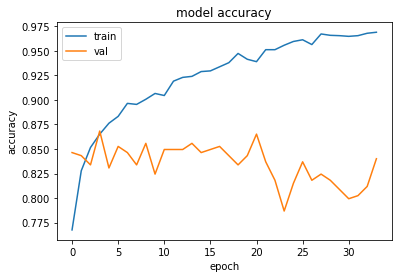

In [93]:
import keras
from matplotlib import pyplot as plt

def plot_fit_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
plot_fit_history(history)

In [94]:
saved_model = load_model('best_model_feature.h5')
loss, accuracy = saved_model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

798/798 [==============================] - 6s 7ms/step
Accuracy: 81.578946


In [ ]:
def make_nn_classification_model(plot=False):
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True))
    model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
    #model.add(LSTM(units=32, input_shape=(1, MAX_SEQUENCE_LENGTH)))
    model.add(Dense(32, activation='relu', kernel_initializer='random_normal', input_dim=MAX_SEQUENCE_LENGTH))
    model.add(Dense(2, activation='softmax'))
    
    opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    # early stopping
    #es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
    #mc = ModelCheckpoint('best_model_feature.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

    # Compile the model
    model.compile(
    optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # summarize the model
    model.summary()
    
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model#, es, mc